<a href="https://colab.research.google.com/github/sampat3504/EDA_Assignment_NYC_Taxis/blob/main/EDA_Assg_NYC_Taxi_Starter_Sampat_Upadhyay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

df = pd.read_parquet('/content/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]

# Initialize an empty list to store sampled data efficiently
df_list = []

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file efficiently using 'pyarrow'
        monthly_data = pd.read_parquet(file_path, engine="pyarrow")

        # Ensure that 'tpep_pickup_datetime' is in datetime format
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])

        # Extract date and hour
        monthly_data['pickup_date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['pickup_hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # Optimize by using groupby() instead of nested loops
        sampled_data = monthly_data.groupby(['pickup_date', 'pickup_hour']).apply(lambda x: x.sample(frac=0.05, random_state=42))

        # Reset index
        sampled_data = sampled_data.reset_index(drop=True)

        # Append sampled monthly data efficiently to list instead of using `concat` in each loop
        df_list.append(sampled_data)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Concatenate the sampled data of all the dates to a single dataframe
df = pd.concat(df_list, ignore_index=True)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [12]:
# Store the df in csv/parquet
df.to_parquet('sampled_trip_records.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [13]:
# Load the new data file

df = pd.read_parquet('sampled_trip_records.parquet')

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
0,2,2023-08-31 23:56:01,2023-09-01 00:18:41,1.0,3.11,1.0,N,114,246,1,...,0.5,0.00,0.00,1.0,26.20,2.5,0.00,2023-08-31,23,NaN
1,2,2023-09-01 00:39:59,2023-09-01 01:00:28,NaN,4.71,NaN,None,113,238,0,...,0.5,4.32,0.00,1.0,33.15,NaN,NaN,2023-09-01,0,NaN
2,2,2023-09-01 00:24:50,2023-09-01 00:27:19,2.0,0.56,1.0,N,142,142,2,...,0.5,0.00,0.00,1.0,10.10,2.5,0.00,2023-09-01,0,NaN
3,2,2023-09-01 00:19:27,2023-09-01 01:04:02,2.0,18.46,2.0,N,132,163,1,...,0.5,15.71,6.94,1.0,98.40,2.5,1.75,2023-09-01,0,NaN
4,2,2023-09-01 00:42:13,2023-09-01 01:20:20,2.0,13.71,1.0,N,249,180,4,...,0.5,0.00,0.00,1.0,64.70,2.5,0.00,2023-09-01,0,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [18]:
# Fix the index and drop any columns that are not needed

df = df.drop(columns=['pickup_date', 'pickup_hour']).reset_index(drop=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [19]:
# Combine the two airport fee columns

df = df.assign(airport_fee_combined=df[['airport_fee', 'Airport_fee']].max(axis=1)).drop(columns=['airport_fee', 'Airport_fee'])

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [20]:
# check where values of fare amount are negative

df[df['fare_amount'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined


Did you notice something different in the `RatecodeID` column for above records?

In [21]:
# Analyse RatecodeID for the negative fare amounts

df[df['fare_amount'] < 0]['RatecodeID'].value_counts()

,count
RatecodeID,


In [23]:
# Find which columns have negative values

numeric_cols = df.select_dtypes(include=['number'])
negative_columns = numeric_cols.loc[:, (numeric_cols < 0).any()].columns
negative_columns

Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee_combined'],
      dtype='object')

In [24]:
# fix these negative values

for col in negative_columns:
    df.loc[df[col] < 0, col] = 0

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [25]:
# Find the proportion of missing values in each column
df.isnull().mean() * 100


,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.420903
trip_distance,0.000000
RatecodeID,3.420903
store_and_fwd_flag,3.420903
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [26]:
# Display the rows with null values
df[df.isnull().any(axis=1)]
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [27]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [28]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [29]:
# Handle any remaining missing values

df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)

df['airport_fee_combined'].fillna(0, inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

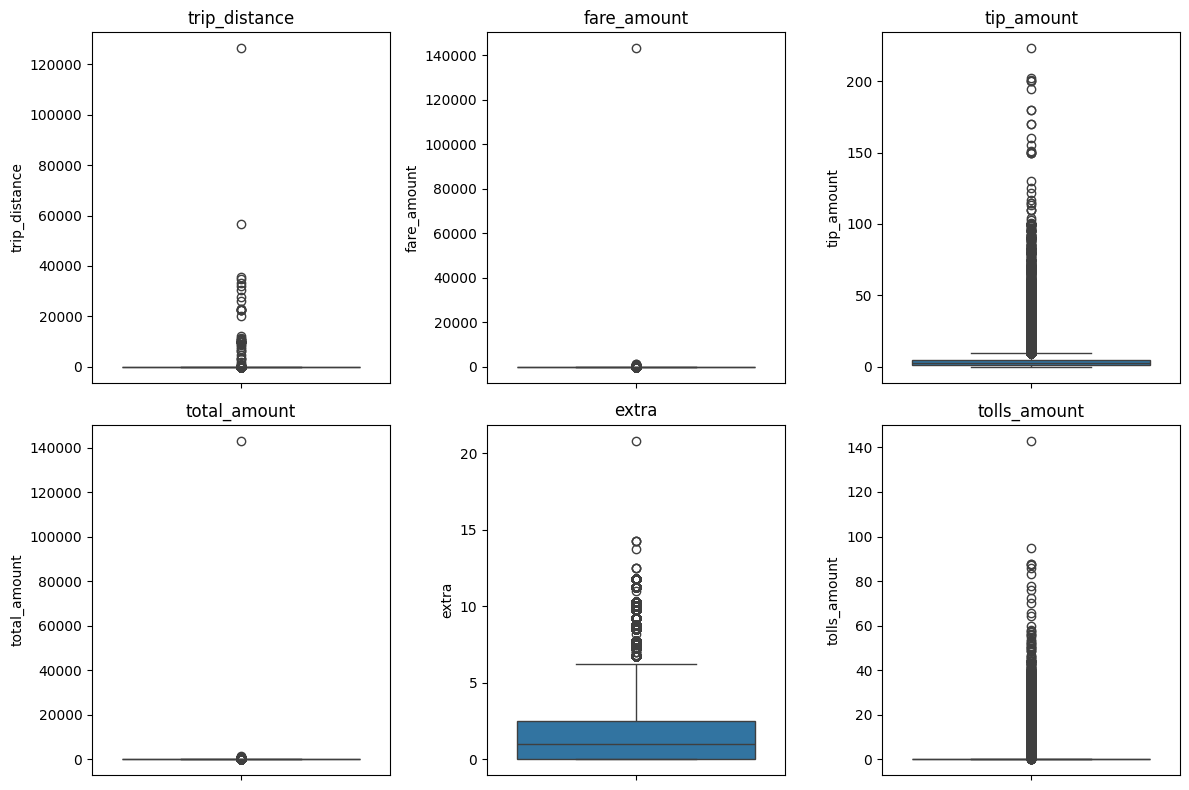

In [30]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df_summary = df.describe()

# Define columns to check for outliers
cols_to_check = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'extra', 'tolls_amount']

# Set up the figure layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Iterate over columns and plot boxplots
for ax, col in zip(axes.flatten(), cols_to_check):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col)

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [31]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [32]:
# Continue with outlier handling

# Remove extreme fare amounts for very short trips
df = df.query("not (trip_distance < 0.1 and fare_amount > 300)")

# Remove zero-distance trips with zero fares where pickup and drop-off locations differ
df = df.query("not (trip_distance == 0 and fare_amount == 0 and PULocationID != DOLocationID)")

# Limit trip distances to a maximum of 250 miles
df = df.query("trip_distance <= 250")

# Remove transactions with invalid payment types
df = df.query("payment_type != 0")


In [33]:
# Do any columns need standardising?
cols_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount']
for col in cols_to_scale:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [34]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:

Answer:

Categorical Variables
* `VendorID`
* `RatecodeID`
* `PULocationID`
* `DOLocationID`
* `payment_type`

Numerical Variables
* `passenger_count`
* `trip_distance`
* `pickup_hour`
* `trip_duration`

Timestamp Variables
* `tpep_pickup_datetime`
* `tpep_dropoff_datetime`

The following monetary parameters belong in the same category, is it categorical or numerical?

Answer:

The following monetary parameters are numerical since they represent continuous amounts.

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

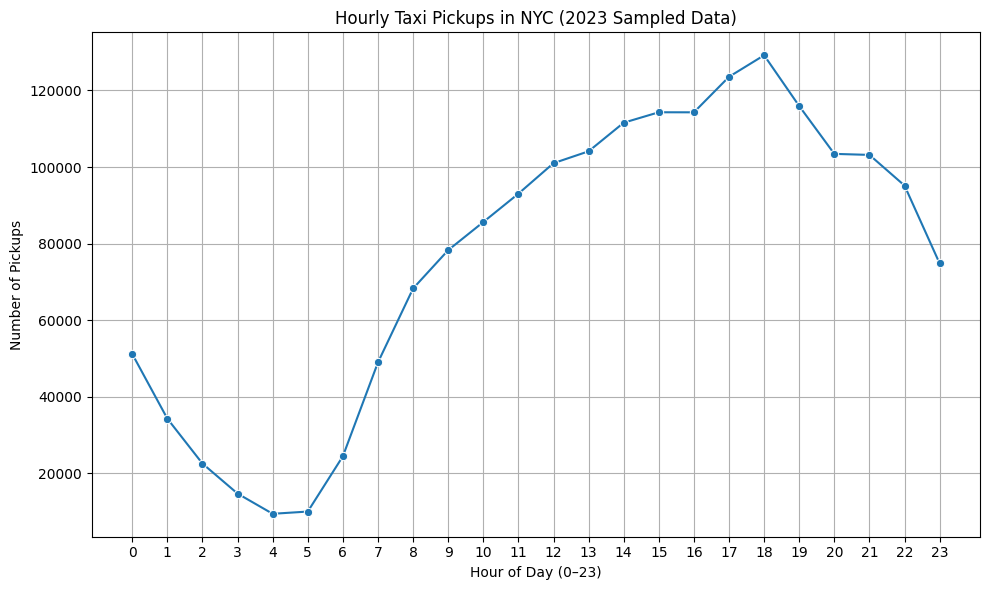

In [35]:
# Find and show the hourly trends in taxi pickups

hourly_trend = df.assign(pickup_hour=df['tpep_pickup_datetime'].dt.hour) \
                 .groupby('pickup_hour').size().reset_index(name='pickup_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trend, x='pickup_hour', y='pickup_count', marker='o')
plt.title('Hourly Taxi Pickups in NYC (2023 Sampled Data)')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


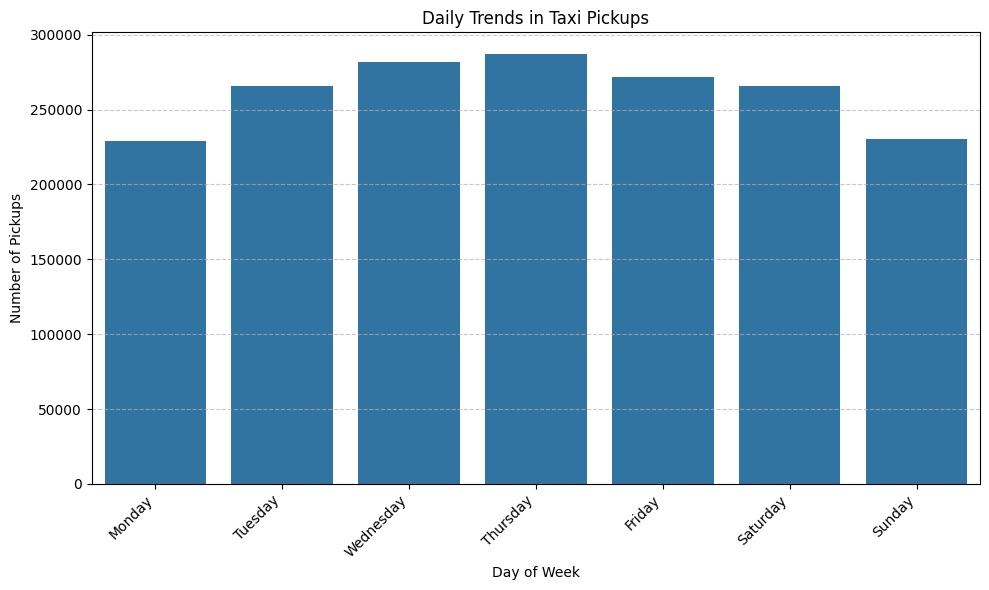

In [36]:
# Find and show the daily trends in taxi pickups (days of the week)


daily_pickups = df.assign(pickup_day=df['tpep_pickup_datetime'].dt.day_name()) \
                 .groupby('pickup_day')['tpep_pickup_datetime'].count()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = daily_pickups.reindex(days_order)
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values)
plt.title('Daily Trends in Taxi Pickups')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45, ha='right')  # Improve label readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle grid for better visual clarity
plt.tight_layout()
plt.show()


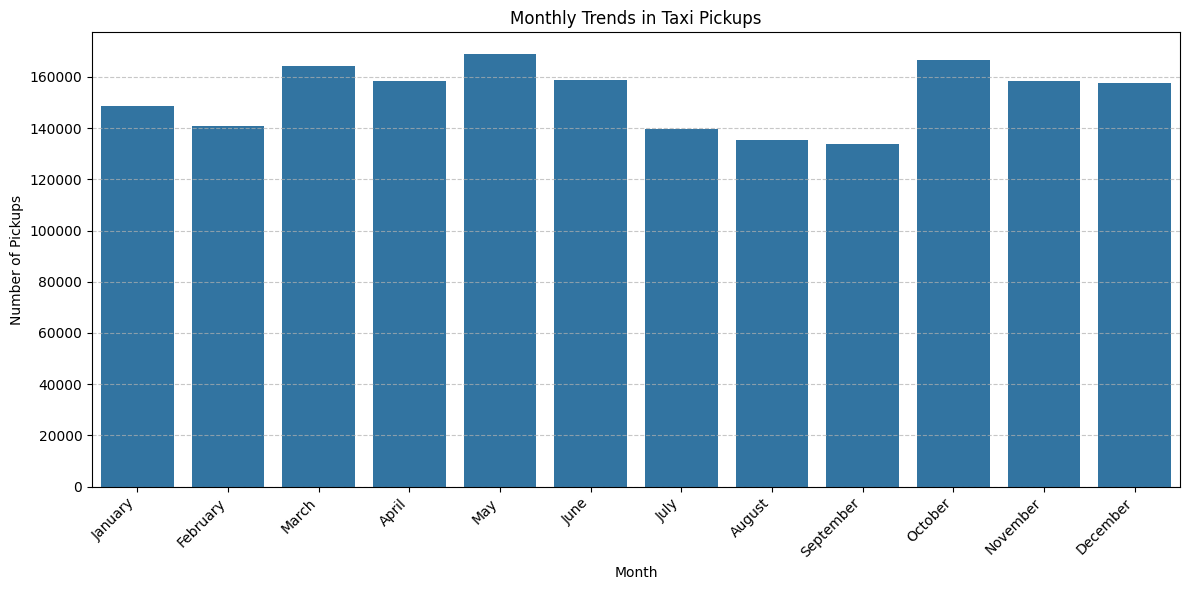

In [37]:
# Show the monthly trends in pickups

monthly_pickups = df.assign(pickup_month=df['tpep_pickup_datetime'].dt.month_name()) \
                   .groupby('pickup_month')['tpep_pickup_datetime'].count() \
                   .reindex(['January', 'February', 'March', 'April', 'May', 'June',
                             'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values)
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [38]:
# Analyse the above parameters

columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

analysis = pd.DataFrame({
    'Zero Count': [df[col].eq(0).sum() for col in columns_to_check],
    'Negative Count': [df[col].lt(0).sum() for col in columns_to_check]
}, index=columns_to_check).round(2)

analysis



,Zero Count,Negative Count
fare_amount,575,0
tip_amount,410234,0
total_amount,329,0
trip_distance,22928,0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [39]:
# Create a df with non zero entries for the selected parameters.

filtered_df = df.loc[(df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']] != 0).all(axis=1)].copy()

print(f"Original shape: {df.shape}")
print(f"Filtered shape: {filtered_df.shape}")


Original shape: (1831391, 19)
Filtered shape: (1412905, 19)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

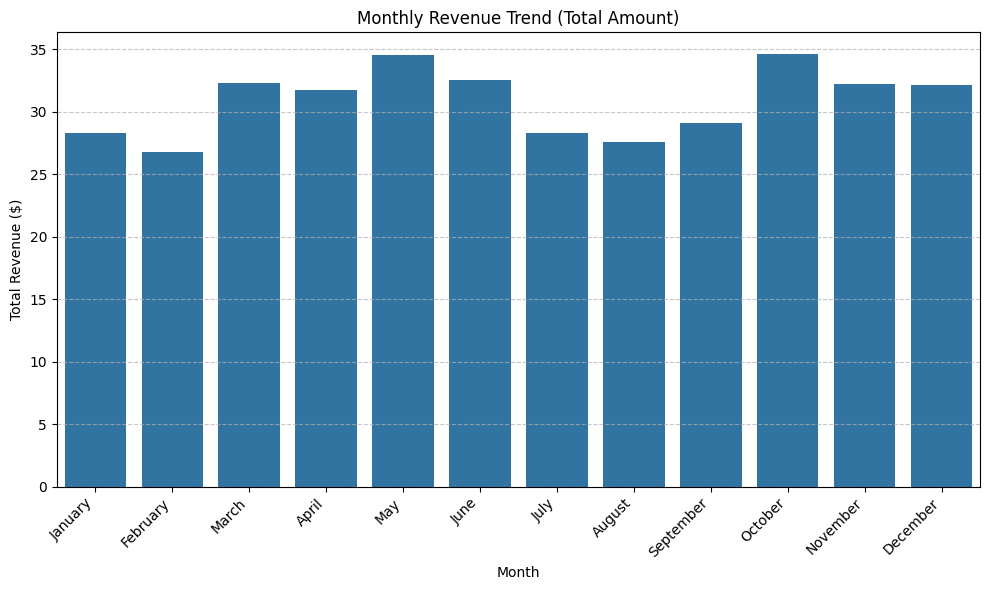

In [40]:
# Group data by month and analyse monthly revenue

if 'pickup_month' not in df.columns:
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(months_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [41]:
# Calculate proportion of each quarter

quarterly_proportion = df.assign(pickup_quarter=df['tpep_pickup_datetime'].dt.to_period('Q')) \
                         .groupby('pickup_quarter')['total_amount'].sum() \
                         .pipe(lambda x: (x / x.sum()) * 100) \
                         .round(2)

quarterly_proportion


,total_amount
pickup_quarter,
2022Q4,0.00
2023Q1,23.61
2023Q2,26.68
2023Q3,22.97
2023Q4,26.74


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

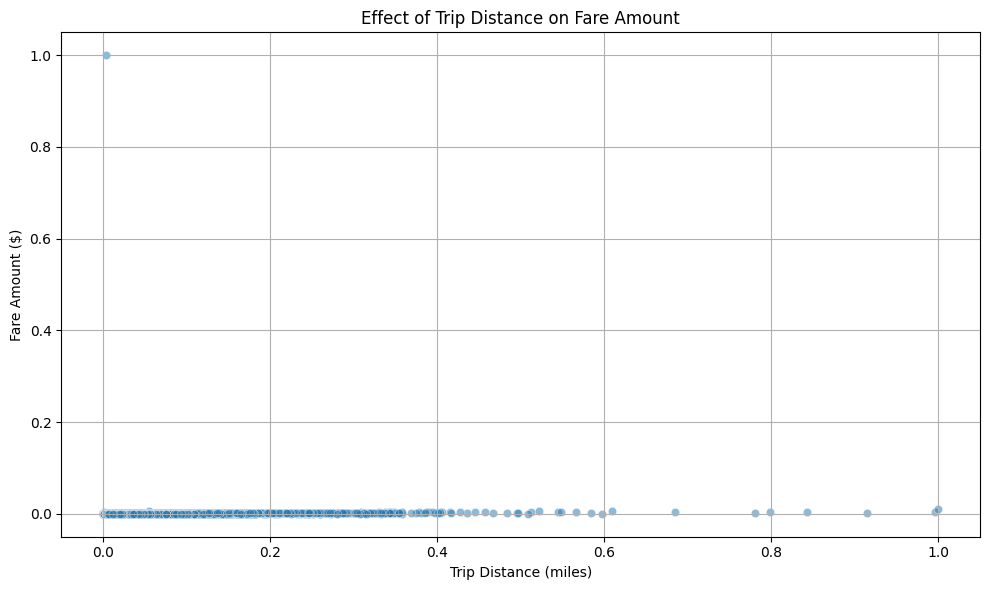

Correlation between trip distance and fare amount (excluding zero-distance trips): 0.16


In [42]:
# Show how trip fare is affected by distance

filtered_df = df.query("trip_distance > 0")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='trip_distance', y='fare_amount', alpha=0.5)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Effect of Trip Distance on Fare Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate correlation between trip distance and fare amount
correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip distance and fare amount (excluding zero-distance trips): {correlation:.2f}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

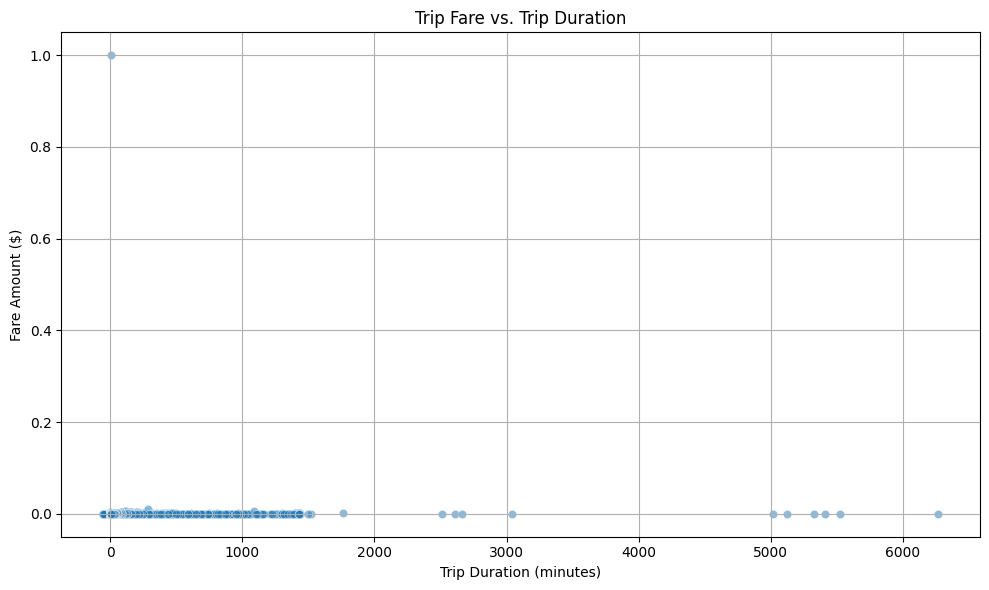

Correlation between trip duration and fare amount: 0.04


In [43]:
# Show relationship between fare and trip duration

df = df.assign(trip_duration=(df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60)

# Plot relationship between trip duration and fare amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_duration', y='fare_amount', alpha=0.5)
plt.title('Trip Fare vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute correlation between trip duration and fare amount
correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")


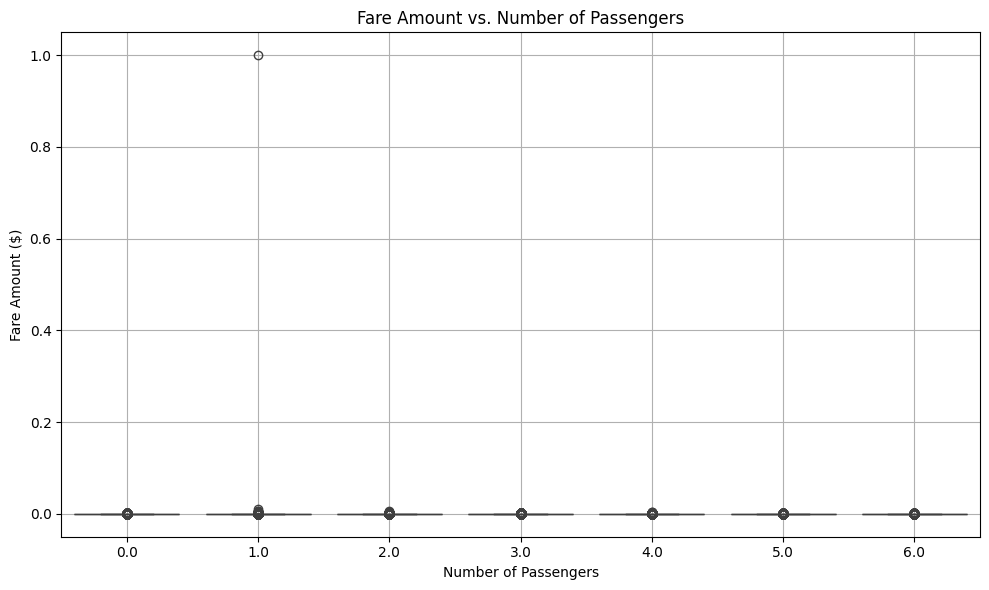

Correlation between passenger count and fare amount: 0.01


In [44]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs. Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute correlation between passenger count and fare amount
correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation:.2f}")



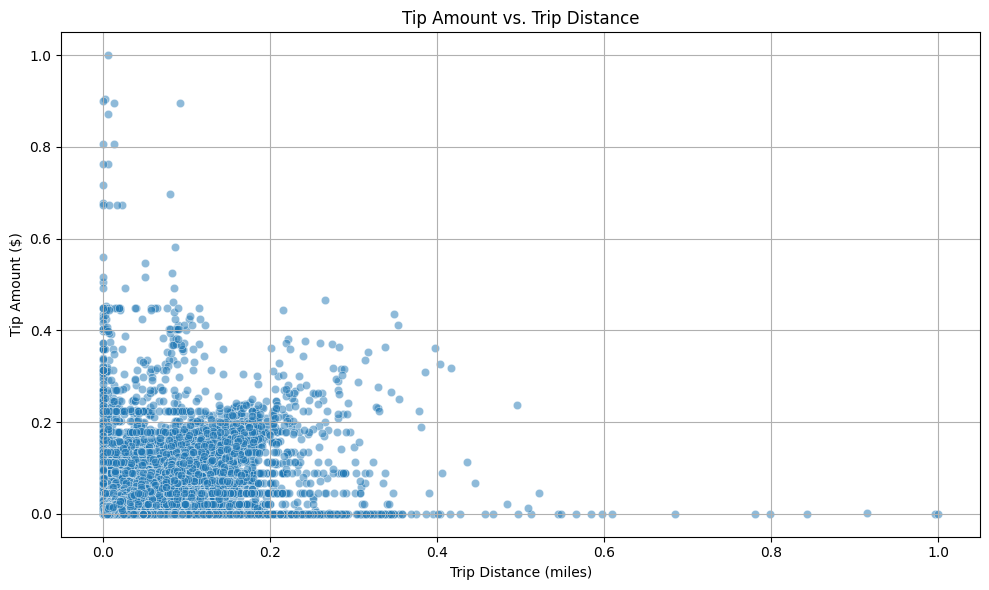

Correlation between trip distance and tip amount: 0.57


In [45]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='tip_amount', alpha=0.5)
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute correlation between trip distance and tip amount
correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

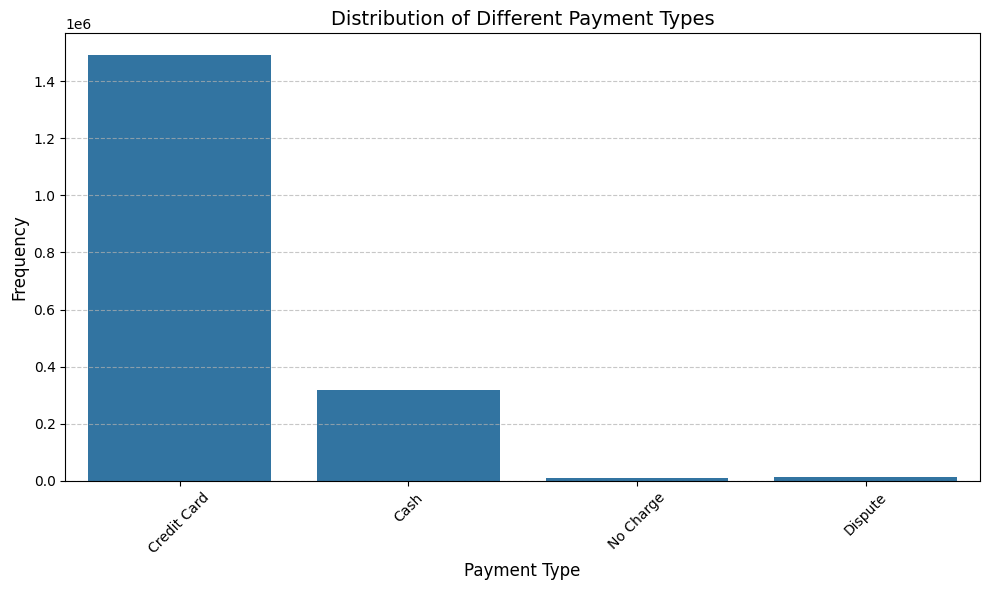

payment_type
1    81.48
2    17.28
3     0.49
4     0.75
Name: count, dtype: float64


In [46]:
# Analyse the distribution of different payment types (payment_type).

payment_type_counts = df['payment_type'].value_counts().reindex(range(1, 7), fill_value=0)


payment_df = pd.DataFrame({
    'Type': ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown', 'Voided Trip'],
    'Count': payment_type_counts.values
}).query("Count > 0")  # Filter out zero counts

# Plot distribution of payment types
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_df, x='Type', y='Count')
plt.title('Distribution of Different Payment Types', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds subtle grid lines
plt.tight_layout()
plt.show()

# Compute percentage distribution of payment types
payment_type_percentage = (payment_type_counts / payment_type_counts.sum()) * 100
print(payment_type_percentage[payment_type_percentage > 0].round(2))




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [47]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [48]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/EDA/data_NYC_Taxi/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

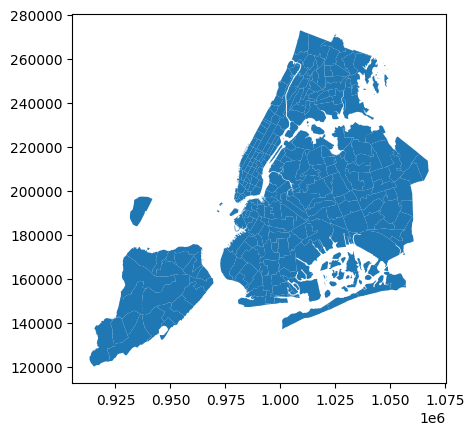

In [49]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [50]:
# Merge zones and trip records using locationID and PULocationID

merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')

merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined,pickup_month,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-08-31 23:56:01,2023-09-01 00:18:41,1.0,0.015181,1.0,N,114,246,1,0.000148,1.0,0.5,0.000000,0.000000,1.0,0.000183,2.5,0.00,August,22.666667,114.0,0.031727,0.000047,Greenwich Village South,114.0,Manhattan,"POLYGON ((986306.712 203122.786, 986300.242 20..."
1,2,2023-09-01 00:24:50,2023-09-01 00:27:19,2.0,0.002734,1.0,N,142,142,2,0.000036,1.0,0.5,0.000000,0.000000,1.0,0.000071,2.5,0.00,September,2.483333,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
2,2,2023-09-01 00:19:27,2023-09-01 01:04:02,2.0,0.090110,2.0,N,132,163,1,0.000489,0.0,0.5,0.070423,0.048531,1.0,0.000687,2.5,1.75,September,44.583333,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
3,2,2023-09-01 00:42:13,2023-09-01 01:20:20,2.0,0.066924,1.0,N,249,180,4,0.000417,1.0,0.5,0.000000,0.000000,1.0,0.000452,2.5,0.00,September,38.116667,249.0,0.036384,0.000072,West Village,249.0,Manhattan,"POLYGON ((983555.319 204876.901, 983469.158 20..."
4,2,2023-09-01 00:11:38,2023-09-01 00:17:56,1.0,0.003466,1.0,N,144,232,1,0.000055,1.0,0.5,0.008965,0.000000,1.0,0.000104,2.5,0.00,September,6.300000,144.0,0.027620,0.000047,Little Italy/NoLiTa,144.0,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [51]:
# Group data by location and calculate the number of trips

trip_counts = df.groupby('PULocationID', as_index=False).size().rename(columns={'size': 'num_trips'})

# Display first few rows of the grouped DataFrame
trip_counts.head()



,PULocationID,num_trips
0,1,214
1,2,2
2,3,40
3,4,1861
4,5,13


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [52]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = zones.merge(trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Display first few rows of the merged GeoDataFrame
zones_with_trips.head()



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,num_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,214.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,40.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1861.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,13.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

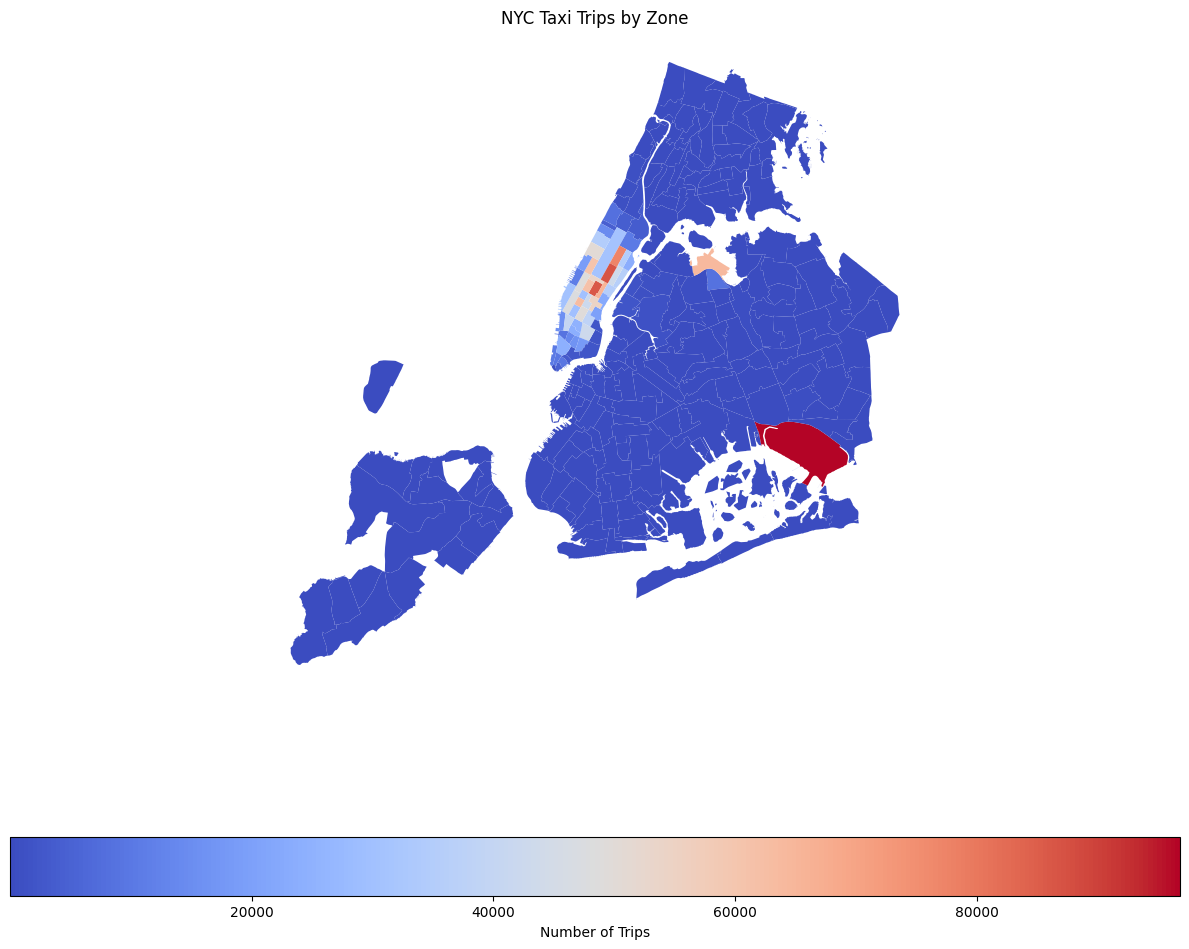

In [53]:
# Define figure and axis
# Plot the map and display it


fig, ax = plt.subplots(figsize=(12, 10))

zones_with_trips.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"},
    cmap='coolwarm'
)

# Customize plot appearance
ax.set_title("NYC Taxi Trips by Zone")
ax.axis('off')
plt.tight_layout()
plt.show()




In [54]:
# can you try displaying the zones DF sorted by the number of trips?

zones_with_trips_sorted = zones_with_trips.sort_values('num_trips', ascending=False)

# Display first few rows of the sorted DataFrame
zones_with_trips_sorted.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,num_trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,96827.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,86905.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,85948.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,77517.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,65634.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [55]:
# Find routes which have the slowest speeds at different times of the day


df_route = df[['PULocationID', 'DOLocationID', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
df_route = df_route.assign(trip_duration_hrs=(df_route['tpep_dropoff_datetime'] - df_route['tpep_pickup_datetime']).dt.total_seconds() / 3600)

# Filter trips with valid duration and distance
df_route = df_route.query("trip_duration_hrs > 0 and trip_distance > 0")

# Extract pickup hour for time-based grouping
df_route = df_route.assign(pickup_hour=df_route['tpep_pickup_datetime'].dt.hour)

# Aggregate speed data by route and hour
speed_data = df_route.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    trip_distance=('trip_distance', 'mean'),
    trip_duration_hrs=('trip_duration_hrs', 'mean')
).reset_index()

# Compute average speed and identify the slowest routes
speed_data = speed_data.assign(avg_speed_mph=speed_data['trip_distance'] / speed_data['trip_duration_hrs'])
slowest_routes = speed_data.nsmallest(10, 'avg_speed_mph')

# Display slowest routes based on average speed
print(slowest_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed_mph']])


        PULocationID  DOLocationID  pickup_hour  avg_speed_mph
102294           232            65           13       0.000026
114929           243           264           17       0.000038
61252            142           142            5       0.000116
120428           258           258            1       0.000128
33393            100             7            8       0.000193
6451              40            65           21       0.000229
39490            113           235           22       0.000235
89226            194           194           16       0.000239
95261            226           145           18       0.000253
9705              45            45           10       0.000290


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

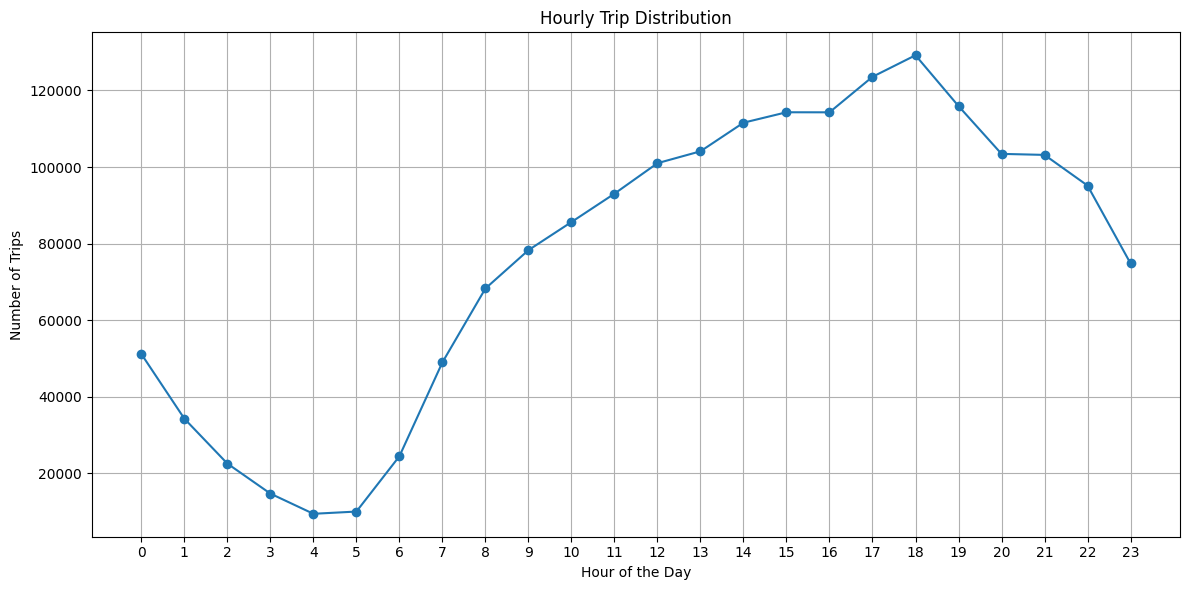

Busiest hour: 18
Number of trips during busiest hour: 129190


In [56]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trips = df.assign(pickup_hour=df['tpep_pickup_datetime'].dt.hour) \
                 .groupby('pickup_hour')['tpep_pickup_datetime'].count() \
                 .reset_index(name='trip_count')

# Identify the busiest hour
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]

# Plot hourly trip distribution
plt.figure(figsize=(12, 6))
plt.plot(hourly_trips['pickup_hour'], hourly_trips['trip_count'], marker='o')
plt.title('Hourly Trip Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Display busiest hour details
print(f"Busiest hour: {busiest_hour['pickup_hour']}")
print(f"Number of trips during busiest hour: {busiest_hour['trip_count']}")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

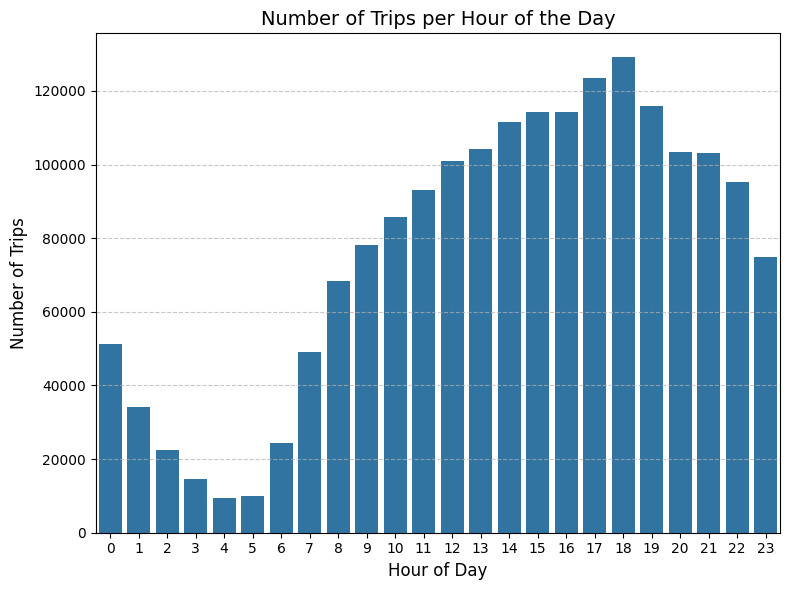

In [57]:
# Extract the hour from pickup datetime

df = df.assign(pickup_hour=df['tpep_pickup_datetime'].dt.hour)

# Compute trip counts per hour and sort
trip_counts = df['pickup_hour'].value_counts().sort_index()

# Plot hourly trip distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=trip_counts.index, y=trip_counts.values)
plt.title('Number of Trips per Hour of the Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds subtle grid lines
plt.tight_layout()
plt.show()


**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [58]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers

sample_fraction = 0.1

# Identify the top 5 busiest hours
top5_hours = trip_counts.nlargest(5)

# Scale up trip counts based on the sampling fraction
scaled_top5 = (top5_hours / sample_fraction).astype(int)

top5_hours


,count
pickup_hour,
18,129190
17,123563
19,115920
15,114301
16,114289


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

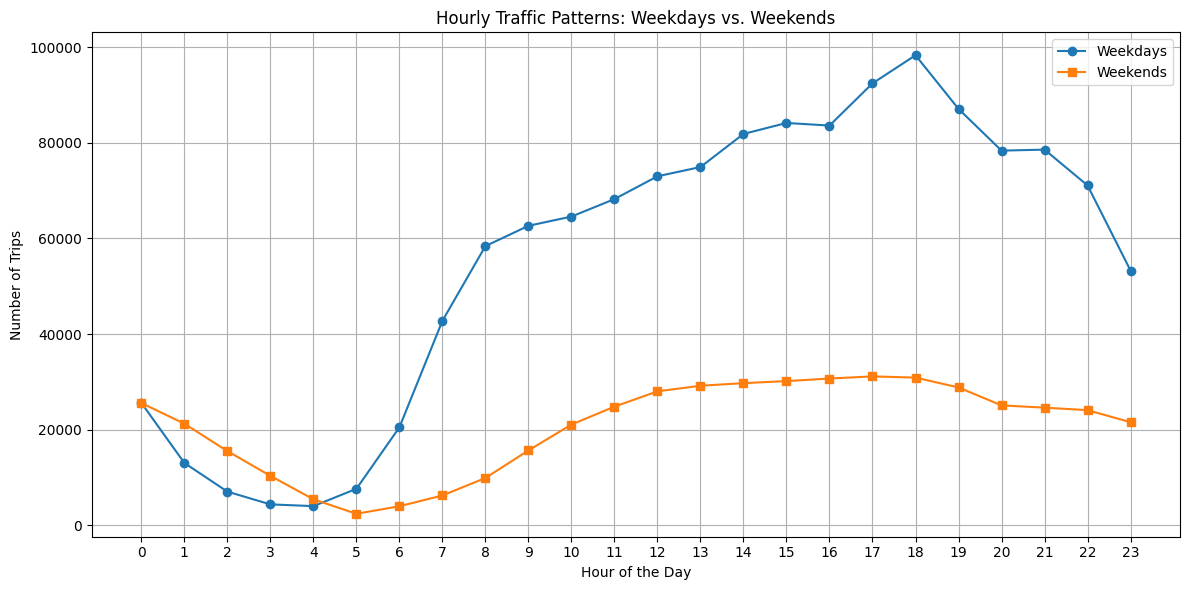

In [59]:
# Compare traffic trends for the week days and weekends

# Extract day of the week (Monday=0, Sunday=6)
df = df.assign(day_of_week=df['tpep_pickup_datetime'].dt.dayofweek)

# Split data into weekdays and weekends
weekdays_df, weekends_df = df.query("day_of_week < 5"), df.query("day_of_week >= 5")

# Compute hourly trip counts for weekdays and weekends
weekday_hourly_counts = weekdays_df.groupby(weekdays_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()
weekend_hourly_counts = weekends_df.groupby(weekends_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()

# Plot traffic trends by hour
plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly_counts.index, weekday_hourly_counts.values, label='Weekdays', marker='o')
plt.plot(weekend_hourly_counts.index, weekend_hourly_counts.values, label='Weekends', marker='s')
plt.title('Hourly Traffic Patterns: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [61]:
# Find top 10 pickup and dropoff zones

# Count pickups by location ID

top_pzone = df['PULocationID'].value_counts().nlargest(10).reset_index()
top_pzone.columns = ['LocationID', 'Pickup_Trips']

# Merge with zones to get corresponding zone names
top_pzone = top_pzone.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Display results
print("Top 10 Pickup Zones:")
top_pzone


Top 10 Pickup Zones:


,LocationID,Pickup_Trips,zone
0,132,96827,JFK Airport
1,237,86905,Upper East Side South
2,161,85948,Midtown Center
3,236,77517,Upper East Side North
4,162,65634,Midtown East
5,138,64177,LaGuardia Airport
6,186,63471,Penn Station/Madison Sq West
7,230,61315,Times Sq/Theatre District
8,142,60887,Lincoln Square East
9,170,54493,Murray Hill


In [62]:
# Identify top 10 dropoff zones based on trip count
top_dzone = df['DOLocationID'].value_counts().nlargest(10).reset_index()
top_dzone.columns = ['LocationID', 'Dropoff_Trips']

# Merge with zones to get corresponding zone names
top_do = top_dzone.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Display results
print("Top 10 Dropoff Zones:")
top_dzone


Top 10 Dropoff Zones:


,LocationID,Dropoff_Trips
0,236,81269
1,237,77558
2,161,71647
3,230,56398
4,170,54314
5,162,52248
6,142,51494
7,239,51260
8,141,48449
9,68,46352


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [63]:
# Find the top 10 and bottom 10 pickup/dropoff ratios


pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')
ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
ratios = ratios.assign(pickup_dropoff_ratio=ratios['pickup_count'] / ratios['dropoff_count'].replace(0, np.nan))
ratios = ratios.reset_index().rename(columns={'index': 'LocationID'}) \
               .merge(zones[['LocationID', 'zone']], on='LocationID', how='left') \
               .set_index('zone')

# Identify top 10 and bottom 10 zones by pickup/dropoff ratio
top_pickup_dropoff_ratio = ratios['pickup_dropoff_ratio'].nlargest(10)
bottom_pickup_dropoff_ratio = ratios['pickup_dropoff_ratio'].nsmallest(10)


In [65]:
top_pickup_dropoff_ratio

,pickup_dropoff_ratio
zone,
East Elmhurst,8.320717
JFK Airport,4.617626
LaGuardia Airport,2.884489
Penn Station/Madison Sq West,1.582187
Central Park,1.374760
Greenwich Village South,1.374743
West Village,1.326222
Midtown East,1.256201
Midtown Center,1.199604


In [66]:
bottom_pickup_dropoff_ratio

,pickup_dropoff_ratio
zone,
West Brighton,0.000000
Broad Channel,0.000000
Oakwood,0.000000
Freshkills Park,0.000000
Breezy Point/Fort Tilden/Riis Beach,0.025641
Stapleton,0.029412
Windsor Terrace,0.038259
Newark Airport,0.040233
Grymes Hill/Clifton,0.043478


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [67]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_df = df.query("tpep_pickup_datetime.dt.hour >= 23 or tpep_pickup_datetime.dt.hour < 5")

# Merge pickup locations with zone names
night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'pickup_zone'}),
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

# Merge dropoff locations with zone names
night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'dropoff_zone'}),
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)

# Compute top 10 pickup zones during night hours
top_night_pickups = night_df.groupby('pickup_zone')['PULocationID'].count().nlargest(10)

# Compute top 10 dropoff zones during night hours
top_night_dropoffs = night_df.groupby('dropoff_zone')['DOLocationID'].count().nlargest(10)


In [68]:
top_night_pickups

,PULocationID
pickup_zone,
East Village,15339
JFK Airport,13399
West Village,12352
Clinton East,9797
Lower East Side,9535
Greenwich Village South,8720
Times Sq/Theatre District,7776
Penn Station/Madison Sq West,6233
Midtown South,5962


In [69]:
top_night_dropoffs

,DOLocationID
dropoff_zone,
East Village,8239
Clinton East,6641
Murray Hill,6085
Gramercy,5627
East Chelsea,5551
Lenox Hill West,5122
West Village,4896
Yorkville West,4878
Lower East Side,4321


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [70]:
# Filter for night hours (11 PM to 5 AM)

# Extract pickup hour from datetime
df = df.assign(pickup_hour=df['tpep_pickup_datetime'].dt.hour)

# Separate nighttime and daytime trips
nighttime_df = df.query("pickup_hour >= 23 or pickup_hour <= 5")  # 11 PM - 5 AM
daytime_df = df.query("6 <= pickup_hour <= 22")  # 6 AM - 10 PM

# Compute revenue for each time period
nighttime_revenue = nighttime_df['total_amount'].sum()
daytime_revenue = daytime_df['total_amount'].sum()
total_revenue = df['total_amount'].sum()

# Calculate revenue share percentages
nighttime_revenue_share = (nighttime_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")


Nighttime Revenue Share: 12.06%
Daytime Revenue Share: 87.94%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [71]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter valid trips with nonzero distance and passenger count
valid_fares = df.query("trip_distance > 0 and passenger_count > 0")

# Compute fare per mile per passenger
valid_fares = valid_fares.assign(
    fare_per_mile_per_passenger=valid_fares['total_amount'] / (valid_fares['trip_distance'] * valid_fares['passenger_count'])
)

# Compute average fare per mile per passenger by passenger count
avg_fare_by_passenger = valid_fares.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

avg_fare_by_passenger



,fare_per_mile_per_passenger
passenger_count,
1.0,0.024175
2.0,0.013309
3.0,0.008308
4.0,0.008498
5.0,0.003936
6.0,0.003173


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [75]:
# Compare the average fare per mile for different days and for different times of the day

valid_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)]

valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name()
valid_df['hour_of_day'] = valid_df['tpep_pickup_datetime'].dt.hour

valid_df['fare_per_mile'] = valid_df['total_amount'] / valid_df['trip_distance']

fare_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().round(2)

fare_by_hour = valid_df.groupby('hour_of_day')['fare_per_mile'].mean().round(2)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day = fare_by_day.reindex(ordered_days)

fare_by_day

,fare_per_mile
day_of_week,
Monday,0.02
Tuesday,0.03
Wednesday,0.02
Thursday,0.02
Friday,0.02
Saturday,0.02
Sunday,0.03


In [76]:
fare_by_hour

,fare_per_mile
hour_of_day,
0,0.02
1,0.02
2,0.02
3,0.02
4,0.03
5,0.03
6,0.02
7,0.02
8,0.02


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

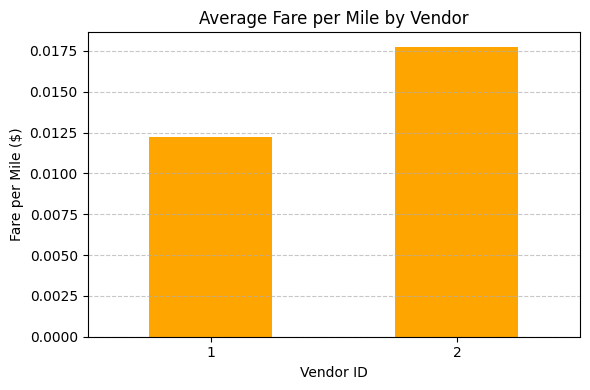

In [77]:
# Compare fare per mile for different vendors
df_vendor = df[df['trip_distance'] > 0].copy()

df_vendor['fare_per_mile'] = df_vendor['fare_amount'] / df_vendor['trip_distance']

vendor_fare_comparison = df_vendor.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare_comparison.plot(kind='bar', color='orange', figsize=(6, 4))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


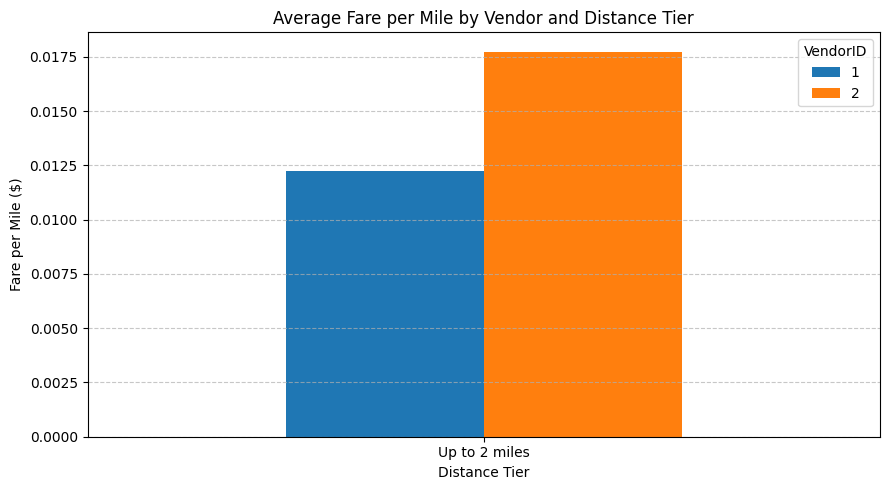

In [78]:
# Defining distance tiers

# Compute fare per mile and filter valid trips
df = df.assign(fare_per_mile=df['fare_amount'] / df['trip_distance']).query("trip_distance > 0")

# Define distance tiers
tier1, tier2, tier3 = (
    df.query("trip_distance <= 2").assign(distance_tier='Up to 2 miles'),
    df.query("2 < trip_distance <= 5").assign(distance_tier='2 to 5 miles'),
    df.query("trip_distance > 5").assign(distance_tier='More than 5 miles')
)

# Combine tiers into a single DataFrame
tiered_data = pd.concat([tier1, tier2, tier3])

# Compute average fare per mile by tier and vendor
avg_fare_by_tier = tiered_data.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().unstack()

# Plot average fare per mile by distance tier
avg_fare_by_tier.plot(kind='bar', figsize=(9, 5))

# Customize plot appearance
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [79]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Compute tip percentage while avoiding division by zero
df = df.assign(tip_percentage=(df['tip_amount'] / (df['total_amount'] + 1e-6)) * 100)

# Select relevant columns for analysis
tips_df = df[['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'pickup_hour', 'tip_percentage']].copy()
tips_df = tips_df.assign(hour=tips_df['pickup_hour'])

# Categorize distance, passenger count, and pickup time
tips_df = tips_df.assign(
    distance_category=pd.cut(tips_df['trip_distance'], [0, 2, 5, float('inf')], labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']),
    passenger_category=pd.cut(tips_df['passenger_count'], [0, 1, 3, float('inf')], labels=['1 passenger', '2-3 passengers', '4+ passengers']),
    time_category=pd.cut(tips_df['hour'], [0, 6, 12, 18, 24], labels=['Midnight to 6 AM', '6 AM to Noon', 'Noon to 6 PM', '6 PM to Midnight'], right=False)
)

# Compute average tip percentages based on different categories
print("Average Tip Percentage by Distance:")
print(tips_df.groupby('distance_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Passenger Count:")
print(tips_df.groupby('passenger_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Time of Pickup:")
print(tips_df.groupby('time_category')['tip_percentage'].mean())

# Identify low tip scenarios
low_tip_factors = tips_df.query("tip_percentage < 10")
print("\nMost Common Low Tip Scenarios:")
print(low_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category'])
                     .size()
                     .sort_values(ascending=False)
                     .head(10))

# Define distance bins for further analysis
distance_bins = [0, 1, 2, 5, 10, 20, 50]
tips_df = tips_df.assign(distance_bin=pd.cut(tips_df['trip_distance'], bins=distance_bins))

# Compute average tip percentage by distance bin
tip_by_distance = tips_df.groupby('distance_bin')['tip_percentage'].mean()


Average Tip Percentage by Distance:
distance_category
Up to 2 miles        7676.350688
2 to 5 miles                 NaN
More than 5 miles            NaN
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_category
1 passenger       7762.079995
2-3 passengers    7462.690167
4+ passengers     7236.778000
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
time_category
Midnight to 6 AM    7434.382746
6 AM to Noon        7585.160093
Noon to 6 PM        7562.828478
6 PM to Midnight    7911.194588
Name: tip_percentage, dtype: float64

Most Common Low Tip Scenarios:
distance_category  passenger_category  time_category   
Up to 2 miles      1 passenger         Noon to 6 PM        110058
                                       6 PM to Midnight     80830
                                       6 AM to Noon         70189
                   2-3 passengers      Noon to 6 PM         34091
                                       6 PM to

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

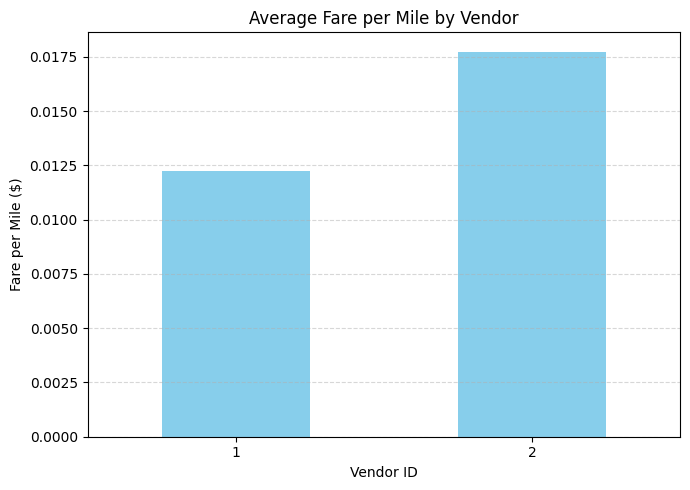

In [80]:
# Compute average fare per mile for each vendor
vendor_fare = df.groupby('VendorID')['fare_per_mile'].mean().sort_values()

# Plot average fare per mile by vendor
vendor_fare.plot(kind='bar', color='skyblue', figsize=(7, 5))

# Customize plot appearance
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


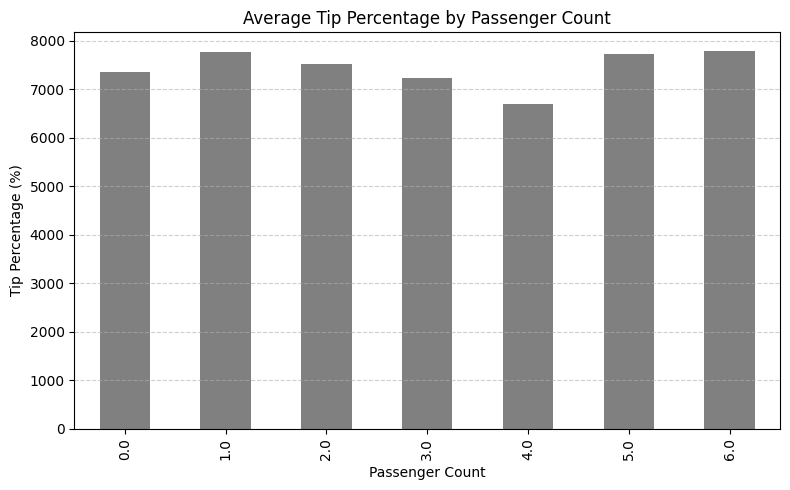

In [81]:
# Compute average tip percentage by passenger count
tip_from_passenger = df.groupby('passenger_count')['tip_percentage'].mean()

# Plot average tip percentage by passenger count
tip_from_passenger.plot(kind='bar', figsize=(8, 5), color='grey')

# Customize plot appearance
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


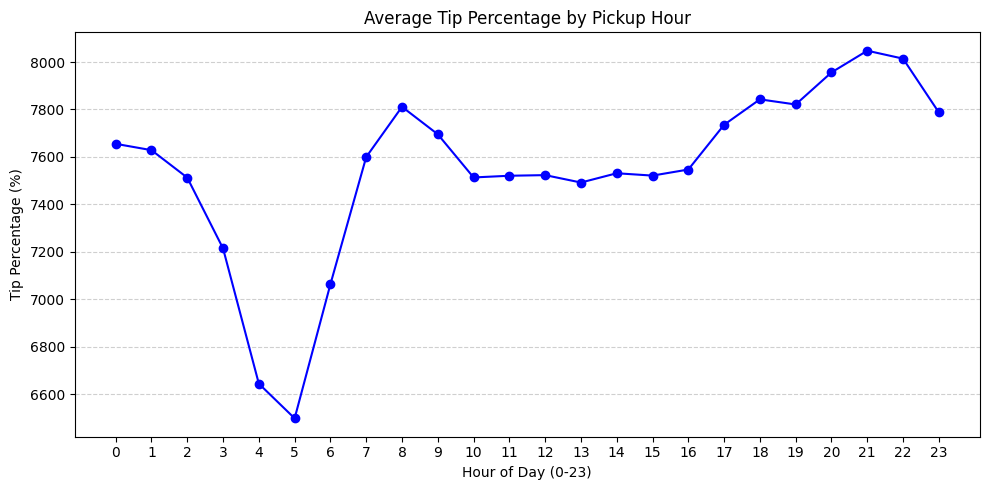

In [82]:
# Extract pickup hour

df = df.assign(pickup_hour=df['tpep_pickup_datetime'].dt.hour)

# Compute average tip percentage by pickup hour
tip_hour = df.groupby('pickup_hour')['tip_percentage'].mean()

# Plot tip percentage trend by pickup hour
tip_hour.plot(kind='line', marker='o', figsize=(10, 5), color='blue')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(24))
plt.tight_layout()
plt.show()


In [83]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Compute tip percentage while avoiding division by zero
df = df.assign(tip_percent=(df['tip_amount'] / (df['fare_amount'] + 1e-6)) * 100)

# Separate trips based on tip percentage thresholds
low_tip, high_tip = df.query("tip_percent < 10").copy(), df.query("tip_percent > 25").copy()

# Compare average trip characteristics for low and high tip trips
comparison = pd.DataFrame({
    'Low Tip (<10%)': [
        low_tip['trip_distance'].mean(),
        low_tip['passenger_count'].mean(),
        low_tip['fare_amount'].mean(),
        low_tip['tip_amount'].mean()
    ],
    'High Tip (>25%)': [
        high_tip['trip_distance'].mean(),
        high_tip['passenger_count'].mean(),
        high_tip['fare_amount'].mean(),
        high_tip['tip_amount'].mean()
    ]
}, index=['Avg Trip Distance', 'Avg Passenger Count', 'Avg Fare Amount', 'Avg Tip Amount'])

# Display results
print("Average Comparison Between Low and High Tip Trips:")
print(comparison.round(2))


Average Comparison Between Low and High Tip Trips:
                     Low Tip (<10%)  High Tip (>25%)
Avg Trip Distance              0.02             0.02
Avg Passenger Count            1.42             1.36
Avg Fare Amount                0.00             0.00
Avg Tip Amount                 0.00             0.02


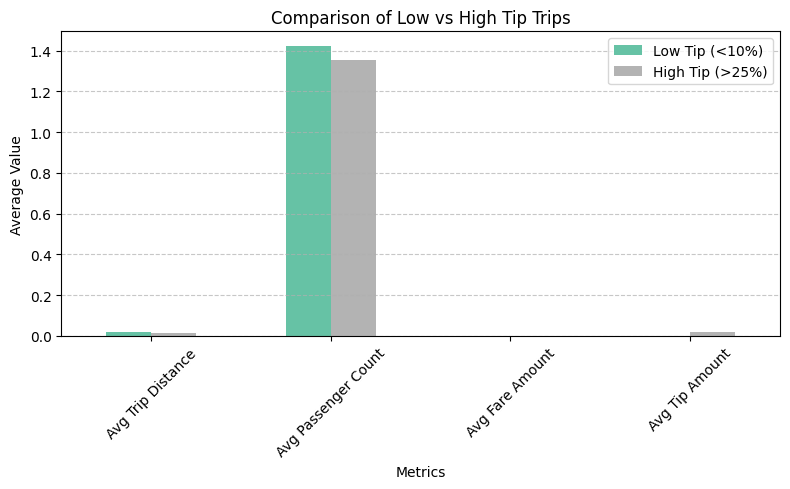

In [84]:
# Plot comparison of low vs high tip trips
comparison.plot(kind='bar', figsize=(8, 5), colormap='Set2')

# Customize plot appearance
plt.title('Comparison of Low vs High Tip Trips')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

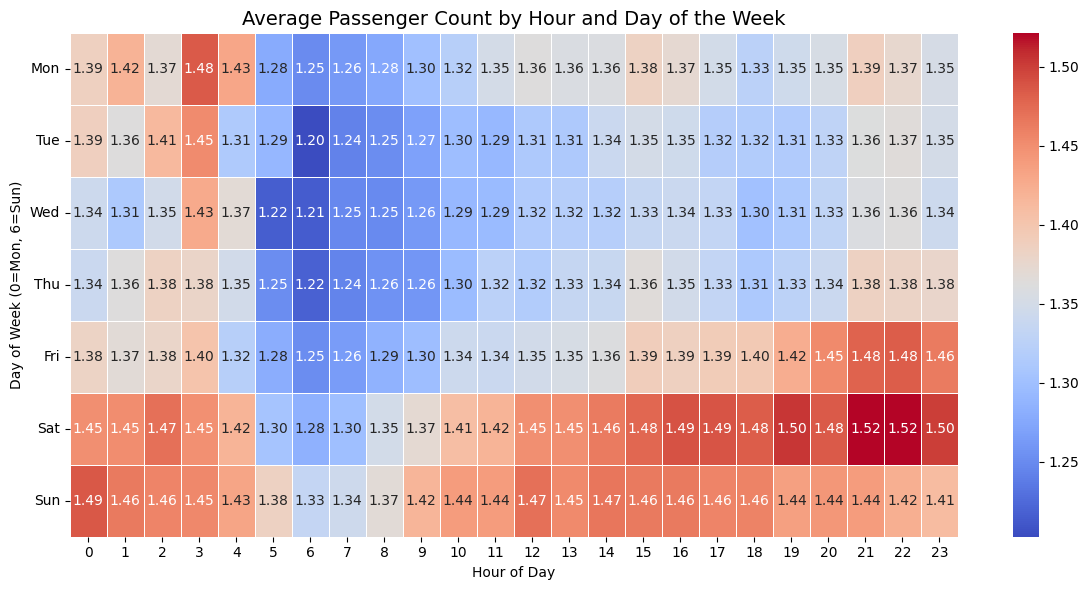

In [85]:
# See how passenger count varies across hours and days

df = df.assign(
    pickup_hour=df['tpep_pickup_datetime'].dt.hour,
    pickup_dayofweek=df['tpep_pickup_datetime'].dt.dayofweek
)

# Compute average passenger count by day and hour
passenger_variation = df.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack()

# Plot passenger count variation using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_variation, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f")

# Customize plot appearance
plt.title('Average Passenger Count by Hour and Day of the Week', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

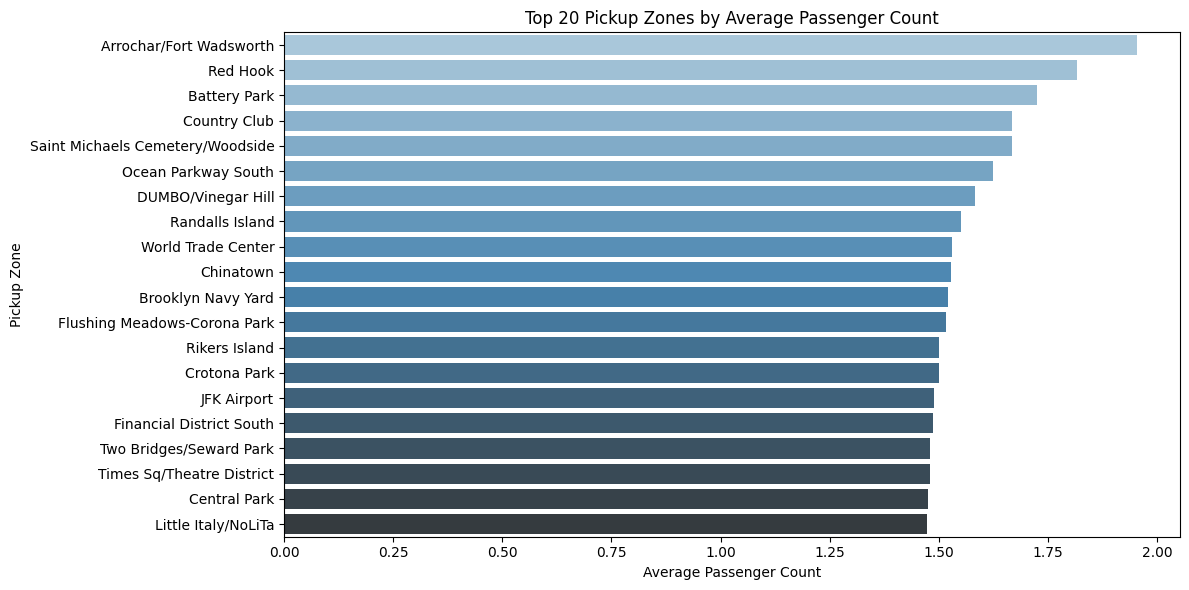

In [89]:
# How does passenger count vary across zones

zone_passenger_avg = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

zone_passenger_avg = zone_passenger_avg.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

zone_passenger_avg = zone_passenger_avg.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone', palette='Blues_d')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

In [91]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID_x,num_trips,PULocationID_y,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,214.0,1.0,1.319149
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0,2.0,1.000000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,40.0,3.0,1.000000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1861.0,4.0,1.415105
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,13.0,5.0,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Surcharge Application (%):
extra                    62.312583
mta_tax                  99.357465
tip_amount               78.127946
tolls_amount              8.095659
improvement_surcharge    99.990323
congestion_surcharge     92.915310
airport_fee_combined      8.782154
dtype: float64


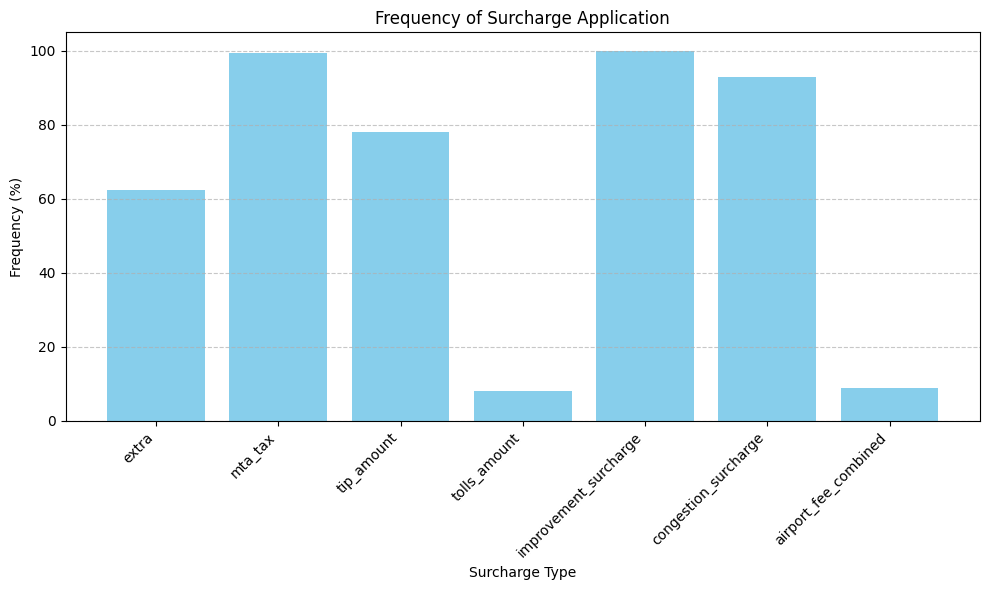

In [93]:
# How often is each surcharge applied?

# Identify surcharge columns
surcharge_colns = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                  'improvement_surcharge', 'congestion_surcharge', 'airport_fee_combined']

# Calculate surcharge application frequency (%)
surcharge_freq = df[surcharge_colns].astype(bool).sum().div(len(df)).mul(100)

# Display results
print("Frequency of Surcharge Application (%):")
print(surcharge_freq)

# Plot surcharge application frequency
plt.figure(figsize=(10, 6))
plt.bar(surcharge_freq.index, surcharge_freq.values, color='skyblue')
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Key Findings from the Analysis**

Based on the analyses of trip patterns, fare structures, tip behavior, passenger variations, and zone-based demand, several insights emerge:

* Peak Demand Hours & Days: The busiest hours for trips tend to be late evening (around 6 PM - 11 PM) and early morning rush hours. Weekends see a surge in nightlife-related pickups, while weekdays show steady demand during commute hours.

* High-Traffic Zones: Top pickup and drop-off zones are concentrated around commercial hubs, airports, and entertainment districts. Nighttime demand shifts towards downtown and nightlife districts, while daytime demand leans toward office areas and transit hubs.

* Fare & Tip Patterns: Short-distance trips tend to have higher tip percentages, while longer trips may have lower tipping rates. Higher fares per mile are charged for short-distance rides, likely due to base fare influence.

* Passenger Trends: Rush hour trips generally have fewer passengers per vehicle, while weekend rides involve more group travelers. Airports and tourist zones see a higher average passenger count per trip compared to local city zones.

* Surcharge Application: Extra charges such as congestion fees, airport surcharges, and tolls are applied frequently.


**Strategic Recommendations for Demand Optimization**


* Demand Forecasting by Time & Location: Focus fleet allocation based on hourly demand trends. Adjust dispatching strategies for commercial zones during weekdays and entertainment zones on weekends for maximum ride efficiency.

* Zone-Based Supply Adjustments: Ensure higher vehicle availability around train stations, airports, and tourist spots, especially during their busiest hours. Redirect supply towards business hubs during commute times and downtown nightlife areas for late-evening rides.

* Fare & Incentive Optimization: Dynamic pricing can be used during peak hours and high-demand zones. Provide targeted promotions for low-demand periods or zones with fewer trips to balance supply and demand.

* Routing & Dispatch Efficiency: Identify routes with slow traffic speeds and optimize dispatching accordingly to avoid delays.

* Customer Satisfaction & Tip Optimization: Encourage passenger-friendly service standards in areas with historically lower tip percentages. Identify low tip scenarios and improve service models where needed.

By implementing these insights, ride service providers can enhance trip efficiency, improve customer satisfaction, and optimize earnings.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**key positioning strategies:**

* Peak-Hour Allocation: During morning rush hours (6 AM - 9 AM), cabs should be stationed at residential areas, transit hubs, and office districts. Evening peak (5 PM - 8 PM) requires more availability near business zones, shopping areas, and entertainment hubs.

* Zone-Based Deployment: Position weekend fleets near nightlife spots, tourist attractions, and airport terminals for late-night surges. On weekdays, focus on commercial hubs and business districts to maximize regular commuter rides.

* Dynamic Rebalancing: If demand suddenly surges in one area due to events, weather changes, or public transport delays, cabs should dynamically shift to accommodate these short-term spikes. Data-driven heatmaps and real-time tracking can help balance vehicle supply efficiently.

* Traffic & Routing Optimization: Cabs should be strategically placed near main roads, avoiding heavy congestion points while ensuring quick access to busy pickup locations. Using predictive analytics, drivers can be guided toward high-demand areas before the surge happens.

* Fare & Demand-Based Prioritization: During low-demand hours, incentivizing drivers through priority zones (hotspots with frequent riders) ensures consistent availability without over-supply. Using zone-specific surge pricing, fleet operators can keep vehicles available where demand is highest, ensuring profitability.

By implementing these strategies, cab fleets can efficiently meet customer demand, reduce idle time, and optimize driver earnings.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

To maximize revenue while staying competitive, the pricing strategy should be data-driven, adjusting dynamically based on demand patterns, trip characteristics, and external factors. Here are some key adjustments:

**Dynamic Pricing Model**

* Implement real-time surge pricing based on demand fluctuations. Higher rates during peak hours and lower fares in off-peak times ensure steady revenue without overpricing.
* Factor in event-based demand spikes, adjusting pricing near stadiums, concerts, and transit hubs before crowds arrive.

**Distance-Based Fare Optimization**

* Short-distance rides should have competitive base fares but slightly higher per-mile rates to balance profitability.
* Long-distance fares could include discounted per-mile rates to encourage riders to opt for extended trips.

**Time-of-Day Pricing Adjustments**

* Nighttime and early-morning rides should include premium pricing for safety and limited availability.
* Midday pricing should be optimized to encourage more riders during lower-demand hours.

**Zone-Based Pricing**

* High-demand pickup zones (airports, business districts) should have slightly increased base fares due to traffic congestion and longer wait times.
* Low-demand zones should use competitive pricing and discounts to increase ridership.

**Subscription & Loyalty Discounts**

* Offer subscription-based ride discounts for frequent commuters.
* Reward loyal riders with fare discounts after a set number of trips.

**Competitive Benchmarking**

* Regularly analyze competitor rates and adjust pricing models to stay within a reasonable range.

By implementing these strategic pricing adjustments, vendors can maximize earnings, attract more customers, and ensure balanced supply-demand economics.